# Praktikum Visi Komputer
## Modul ke-5

## Ekstraksi fitur dan Implementasinya pada citra panorama

Pada modul ini, kita akan belajar cara mendeteksi titik-titik penting, atau dikenal juga sebagai keypoint, dari suatu citra. Kita akan membahas alasan mengapa keypoint ini penting dan bagaimana menggunakannya untuk memahami konten suatu citra. Selain itu kita juga akan membahas beberapa teknik yang digunakan untuk mendeteksi keypoint dan memahami bagaimana kita dapat mengekstraksi fitur dari suatu citra tertentu. Selain itu, kita akan mempelajari bagaimana cara menjahit/stitch beberapa citra dari scene/pemandangan yang sama untuk membuat citra panorama (*panoramic image*). 


### Keypoint? What for?

Analisis konten citra/gambar merupakan proses untuk memahami konten daripada suatu citra sehingga kita dapat menentukan aksi tertentu berdasarkan hasil pemahaman tersebut. Untuk memahami keypoint, kita perhatikan bagaimana manusia melakukannya. Otak kita ini sebetulnya mesin yang sangat canggih, yang dapat melakukan hal yang rumit dengan sangat cepat. Ketika manusia melihat sesuatu, otak manusia secara otomatis mencipta jejak (footprint) berdasarkan aspek-aspek "menarik" pada citra. Kita akan lihat makna dari kata "menarik" tersebut pada bahasan modul ini.

Pada bahasan awal ini, aspek menarik yang dimaksud berupa sesuatu yang berbeda di dalam suatu kawasan/region. Jika kita menganggap suatu titik menarik, berarti tidak ada titik tetangganya yang memenuhi constraint/batasan (supaya dianggap menarik) pada kawasan tersebut. 

Coba lihat [gambar berikut ini](https://i.im.ge/2021/09/22/TCa229.png). Lalu tutup mata anda dan bayangkan gambar tersebut. Apakah ada sesuatu yang spesial pada gambar tersebut? Bisa bayangkan, apa yang berbeda di sebelah kiri gambar? Kemungkinan besar jawaban anda adalah tidak ada yang berbeda, hanya gambar warna biru polos. Hal ini disebabkan gambar tersebut tidak memiliki informasi menarik. Ketika mata melihat dan otak memproses gambar seperti itu, maka tidak ada catatan penting tentang gambar yang akan disimpan. 

Coba lihat [gambar berikut ini](https://i.im.ge/2021/09/23/TCicz0.png). Lalu tutup mata anda dan bayangkan gambar tersebut. Anda akan mengingat kembali detil gambar tersebut dengan sangat jelas. Hal ini disebabkan karena terdapat banyak kawasan/region penting pada gambar tersebut. Mata manusia lebih sensitif terhadap konten berfrekuensi tinggi dibandingkan konten berfrekuensi rendah. Inilah alasannya kita dapat dengan mudah mengingat kembali gambar kedua tadi dibandingkan gambar yang pertama. 

Kita lanjutkan percobaan, coba lihat [gambar berikut ini](https://i.im.ge/2021/09/23/TCiRjc.png). Apabila anda perhatikan, mata anda akan segera bergerak ke bagian remote TV, walaupun letaknya di ujung sekali, bukan di tengah. Kita biasanya akan otomatis bergerak menuju kawasan/region 'menarik' pada suatu gambar sebab pada bagian itulah informasi bisa didapatkan. Inilah yang disimpan oleh otak untuk keperluan mengingat kembali.

Sehingga saat kita membangun sistem pengenal/rekognisi objek, kita perlulah mendeteksi kawasan/region **"menarik"** tersebut untuk menghasilkan *signature* bagi citra tersebut. Kawasan menarik ini dikarakteristikkan oleh keypoint. Inilah mengapa deteksi keypoint sangatlah penting pada sistem visi komputer (computer vision system).


### Makna keypoint

Sekarang kita sudah lebih paham bahwa keypoint merujuk pada kawasan menarik di dalam suatu citra. Jadi keypoint ini terdiri dari apa? Di mana letak keypoint? 

Ketika kita mengatakan "menarik", maka maknanya ada sesuatu yang terjadi pada kawasan citra tersebut. Jika kawasannya uniform (sama saja bentuknya), maka tentulah tidak terlalu menarik. Sebagai contoh, suatu sudut adalah menarik karena ada perubahan yang tajam pada intensitas dari dua arah berlainan. Setiap sudut menjadi titik unik di mana dua sisi bertemu. Apabila kita perhatikan [gambar sebelumnya ini](https://i.im.ge/2021/09/23/TCiRjc.png), anda dapat melihat bahwa kawasan menarik tidak hanya terdiri dari konten "menarik".

Kita lihat contoh [gambar lainnya berikut ini](https://i.im.ge/2021/09/23/TCiVUx.png). Kita perhatikan bahwa bagian interior dari kawasan menarik ini "tidak menarik".

<a href="https://im.ge/i/TCik4J"><img src="https://i.im.ge/2021/09/23/TCik4J.md.png" alt="TCik4J.md.png" border="0"></a>

Jadi apabila kita ingin mengkarakteristikkan objek ini, kita perlu memastikan untuk memilih titik-titik menarik. Namun, bagaimana cara mendefinisikan "titik-titik menarik"? Dapatkan kita berpikir bahwa sesuatu yang bukan tidak menarik adalah "titik-titik menarik"? Kita perhatikan gambar berikut ini.

[![meja](https://i.im.ge/2022/09/24/15ZVJC.meja.md.png)](https://im.ge/i/15ZVJC)

Pada gambar tersebut terdapat banyak konten berfrekuensi tinggi sepanjang tepinya. Namun kita tidak bisa menganggap semua tepi ini "menarik". Perlu dipahami bahwa "menarik" tidak hanya merujuk pada warna dan nilai intensitas. Namun sesuatu "menarik" yang dimaksud bisa apa saja, sepanjang hal tersebut berbeda. Kita perlu mengisolasi titik-titik yang unik pada daerah sekitarnya (neighborhood). Titik-titik sepanjang tepi tidak menarik jika dibandingkan dengan daerah sekitarnya. 

Jadi bagaimana kita memilih titik menarik? Coba perhatikan sudut meja. Sudut ini unik jika dibandingkan dengan daerah sekelilingnya, yang tidak ada bentuk lain yang sama. Jadi cukup "menarik" kan? Jadi titik ini dapat dipilih sebagai salah satu dari keypoint. Kita akan mengambil banyak keypoint untuk mengkarakteristikkan suatu gambar tertentu.

Saat kita melakukan analisis citra (image analysis), kita perlu mengkonversi keypoint menjadi bentuk numerik sebelum kita menarik kesimpulan. Keypoint-keypoint ini akan direpresentasikan dalam bentuk numerik, lalu kombinasi dari semua keypoint tersebut digunakan untuk membuat *image signature*. Kita ingin *image signature* ini dapat mewakilkan citra yang diberikan dengan baik.


### Deteksi sudut

Pada penjelasan sebelumnya kita sudah tahu bahwa sudut adalah suatu hal yang "menarik". Maka di sini kita akan melihat bagaimana cara mendeteksinya. Dalam bidang visi komputer, terdapat teknik deteksi sudut yang terkenal yaitu **Harris Corner Detector**. Pada teknik ini, secara ringkasnya kita membangun matriks 2x2 berbasis *partial derivative* dari citra grayscale, kemudian menganalisa eigenvalue. Artikel paper aslinya dapat dibaca di [sini](http://www.bmva.org/bmvc/1988/avc-88-023.pdf). Suatu titik sudut merupakan titik yang memiliki nilai eigenvalue yang besar.
Perhatikan gambar berikut ini:

<a href="https://im.ge/i/TCwtW0"><img src="https://i.im.ge/2021/09/23/TCwtW0.md.png" alt="TCwtW0.md.png" border="0"></a>

Apabila kita menjalankan teknik Harris Corner Detector pada gambar tersebut, maka akan muncul gambar berikut.

[![box](https://i.im.ge/2022/09/24/15KXfG.box.md.png)](https://im.ge/i/15KXfG)

Seperti yang terlihat pada gambar di atas, semua titik hitam merupakan sudut pada gambar. Jika kita perhatikan, sudut pada bagian bawah kotak tidak terdeteksi. Hal ini disebabkan karena sudut tersebut tidak cukup tajam. Namun anda dapat mengubah *threshold* pada corner detector agar dapat mendeteksi sudut tersebut. Kode programnya seperti di bawah.


In [47]:
#Deteksi sudut

import cv2
import numpy as np

#download gambar di https://i.im.ge/2021/09/23/TCwtW0.md.png
img = cv2.imread('gambar/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

#dst = cv2.cornerHarris(gray, 4,5, 0.04) # to detect only sharp corners
dst = cv2.cornerHarris(gray, 14, 5, 0.04) # to detect soft corners

# Result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0,0,0]

cv2.imshow('Harris Corners',img)
cv2.waitKey()
cv2.destroyAllWindows()

### Good feature to track

Harris corner detector sebenarnya memiliki performa yang baik pada banyak kasus, namun masih tetap ada yang tertinggal. Sekitar 6 tahun setelah paper asli dari Harris dan Stephen, Shi-Tomasi muncul dengan corner detector yang lebih baik. Papernya dapat dibaca di [sini](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf). Shi-Tomasi menggunakan fungsi scoring yang berbeda untuk memperbaiki kualitas secara keseluruhan. Dengan menggunakan metode ini, kita dapat menemukan 'N' sudut terkuat pada citra yang diberikan. Hal ini sangat berguna ketika kita tidak perlu menggunakan setiap sudut untuk melakukan ekstraksi informasi dari citra. Kode programnya seperti di bawah.


In [48]:
#Deteksi dengan Good feature to track

import cv2
import numpy as np

img = cv2.imread('gambar/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 7, 0.05, 25)
corners = np.float32(corners)

red_color = (0, 0, 255)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (int(x),int(y)), 5, red_color, -1)
    
cv2.imshow("Top 'k' features", img)
cv2.waitKey()
cv2.destroyAllWindows()

### Scale Invariant Feature Transform (SIFT)

Walaupun fitur sudut ini "menarik", namun belum cukup untuk mengkarakteristikkan bagian menarik yang sebenarnya. Saat kita membahas tentang analisis konten citra, kita ingin *image signature* bersifat *invariant* (tidak berubah) terhadap proses seperti pembesaran (scale), rotasi (rotation), cahaya (illumination) dan lainnya. 

Manusia sangat mahir dalam hal ini. Misalkan diberikan suatu gambar apel yang terbalik dan tidak cerah warnanya, manusia dapat tetapi mengenalinya. Apabila gambar yang diberikan sudah diperbesar, manusia dapat tetap mengenalinya. Kita ingin agar sistem pengenal citra dapat melakukan hal yang sama.

Kita pertimbangkan fitur sudut. Ternyata apabila citra diperbesar, sudut dapat berhenti menjadi sudut seperti pada gambar berikut.

[![sudut](https://i.im.ge/2022/09/24/15KF8J.sudut.md.png)](https://im.ge/i/15KF8J)

Kedua sudut pada gambar di atas sebenarnya berasal dari gambar yang sama. Detector tidak dapat mendeteksi sudut pada gambar yang sudah diperbesar. Sehingga gambar sudut kedua, tidak *matching*/sepadan dengan gambar sudut pertama. Hal ini menandakan bahwa *corner detector* tidak bersifat *scale invariant*. Sehingga kita memerlukan metode lain untuk mengkarakteristikkan citra.

SIFT (Scale Invariant Feature Transform) merupakan salah satu algoritma yang terkenal dalam bidang visi komputer. Detil algoritma SIFT dapat dibaca pada [artikel ini](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf). Algoritma SIFT dapat digunakan untuk mengekstrak keypoint dan membangun *feature descriptor* yang sesuai. Untuk mengidentifikasikan keypoint yang potensial, SIFT membangun piramida dari berbagai jenis ukuran citra yang dikaji lalu menghitung **Difference of Gaussian (DoG)**. Jadi kita menjalankan filter Gaussian pada setiap level lalu mengambil perbedaannya (difference) pada setiap level piramida. 

[![dog](https://i.im.ge/2022/09/24/15K0LY.dog.png)](https://im.ge/i/15K0LY)

[![dog1](https://i.im.ge/2022/09/24/15K53D.dog1.md.png)](https://im.ge/i/15K53D)

Kemudian proses berlanjut untuk mendeteksi titik sekarang sebagai keypoint dengan membandingkannya dengan titik tetangganya (neighboring) juga dengan titik-titik tetangga pada citra yang bertetanggaan pada level piramida. Titik yang terpilih sebagai keypoint adalah titik maxima. Hal inilah yang menjadikan algoritma SIFT menjad *scale invariant*.

[![sift](https://i.im.ge/2022/09/24/15KkYS.sift.png)](https://im.ge/i/15KkYS)

Sesudah keypoint berhasil diidentifikasi, setiap keypoint akan diberikan orientasi. Kita ambil titik tetangga dari setiap keypoint lalu menghitung *gradient magnitude* (intensitas piksel) dan arahnya. Informasi ini memadankan keypoint ini ke titik yang sama pada gambar yang lain walaupun gambar itu sudah dirotasi. 

[![sift1](https://i.im.ge/2022/09/24/15KJzK.sift1.png)](https://im.ge/i/15KJzK)

G(x): gradient x berupa pengurangan antara 55 & 46, hasilnya Gx = 9. G(y): gradient y berupa pengurangan antara 56 & 42, hasilnya Gy = 14.

Berikutnya dicari magnitude dan orientasinya:

Magnitude =  √[(Gx)2+(Gy)2]  =  16.64

Φ = atan(Gy / Gx) = atan(1.55) = 57.17

Berikutnya membuat histogram magnitude dan orientasi. Dari informasi tersebut, barulah dibuat *keypoint descriptor*. 

[![sift2](https://i.im.ge/2022/09/24/15VryC.sift2.md.png)](https://im.ge/i/15VryC)

In [49]:
#Ekstraksi fitur dengan SIFT
#Kode berikut ini untuk mengakali SIFT yang hanya bisa digunakan pada library opencv-contrib-python
import cv2

#Download gambar di https://i.im.ge/2021/09/23/TCAVhY.png
img = cv2.imread('gambar/img12.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints = sift.detect(gray,None)
cv2.drawKeypoints(gray,keypoints,img)
#cv2.drawKeypoints(img, keypoints, img, (51, 163, 236), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT features', img)
cv2.waitKey()
cv2.destroyAllWindows()

Karena banyak algoritma ekstraksi fitur memerlukan library opencv-contrib-python maka kita akan sedikit mengubah library opencv yang digunakan. Kita uninstall library opencv yang sebelumnya dengan cara: `pip uninstall opencv-python` lalu kita install opencv-contrib-python dengan cara: `pip install opencv-contrib-python`. Kemudian coba code berikut, untuk mengetahui apakah SIFT sudah dikenal atau belum.

In [50]:
import cv2
sift = cv2.xfeatures2d.SIFT_create()

In [51]:
#Ekstraksi fitur dengan SIFT
#Kode berikut ini apabila anda sudah berhasil install opencv-contrib-python

import cv2
import numpy as np

input_image = cv2.imread('gambar/img12.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray_image, None)
input_image = cv2.drawKeypoints(input_image, keypoints, input_image, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT features', input_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Speeded Up Robust Features (SURF)

Walaupun SIFT berjalan baik dan berguna, namun algoritma ini *computationally intensive*. Maknanya algoritma ini lambat sehingga kurang sesuai digunakan pada sistem real-time. Oleh karena itu, kita perlu sistem yang cepat dan memiliki semua kelebihan dari SIFT. Kita ingat kembali, SIFT menggunakan DoG untuk membangun piramida dan proses ini adalah lambat. Jadi untuk mengatasi masalah ini, SURF (Speeded Up Robust Features) menggunakan filter kotak sederhana untuk memperkirakan nilai Gaussian. Ternyata proses ini mudah dikomputasi dan jauh lebih cepat. SURF terdiri dari 2 langkah utama yaitu ekstraksi fitur dan deskripsi fitur. SURF juga memanfaatkan citra integral (integral image). Komputasinya memanfaatkan Hessian matrix. Artikel asli mengenai SURF dapat dibaca di [sini](http://www.vision.ee.ethz.ch/~surf/eccv06.pdf).


In [52]:
#Ekstraksi fitur dengan SURF
#Namun sayangnya code ini tidak dapat dijalankan sebab SURF ini dipatenkan 
#sehingga OpenCV versi >3 telah mengeluarkan semua non-free algorithm

import cv2
import numpy as np

img = cv2.imread('gambar/img12.png')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(500)

# This threshold controls the number of keypoints
surf.hessianThreshold = 15000

kp, des = surf.detectAndCompute(gray, None)
img = cv2.drawKeypoints(img, kp, None, (0,255,0), 4)

cv2.imshow('SURF features', img)
cv2.waitKey()
cv2.destoryAllWindows()

error: OpenCV(4.6.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1027: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


### Features from Accelerated Segment Test (FAST)

Sebenarnya SURF sudah jauh lebih cepat dari SIFT, namun sayangnya masih juga kurang cepat untuk penggunaan pada sistem real-time, terutama bila ada batasan sumber daya (resource). Misalnya kita membangun aplikasi real-time pada perangkat mobile, maka kita akan kesulitan untuk menggunakan SURF. Oleh karena itu, kita perlu suatu algoritma yang cepat dan *computationally inexpensive*. Maka Rosten dan Drummond muncul dengan algoritma FAST (Features from Accelerated Segment Test). Sesuai dengan namanya, algoritma ini sangatlah cepat. Namun algoritma FAST hanya berupa deteksi keypoint saja. Sesudah keypoint terdeteksi, maka kita masih memerlukan algoritma SIFT atau SURF untuk melakukan komputasi descriptor. 


In [53]:
#Deteksi fitur dengan FAST

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Download gambar di https://i.im.ge/2021/09/24/TCYzzF.png
img = cv.imread('gambar/img13.png',0) 

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png', img2)
cv.imshow('FAST features dengan semua defaul parameter', img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imwrite('fast_false.png', img3)
#plt.imshow(img3)
cv.imshow('FAST features dengan nonmaxSuppression', img3)
cv.waitKey()
cv2.destroyAllWindows()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 4645
Total Keypoints without nonmaxSuppression: 14277


### Binary Robust Independent Elementary Features (BRIEF)

Algoritma FAST dapat secara cepat mendeteksi keypoints, namun kita masih memerlukan SIFT atau SURF untuk menghitung descriptor. Jadi kita perlu cara yang cepat untuk menghitung descriptor. BRIEF merupakan metod untuk melakukan ekstraksi fitur descriptor. Algoritma ini tidak dapat mendeteksi keypoint, sehingga algoritma ini digunakan bersamaan dengan algoritma deteksi keypoint. Namun kelebihan BRIEF ini adalah compact dan cepat.


In [54]:
#Keypoint descriptor dengan BRIEF

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('gambar/img13.png',0)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print( brief.descriptorSize() )
print( des.shape )

img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imshow('FAST features dengan BRIEF', img2)
cv.waitKey()
cv2.destroyAllWindows()

32
(101, 32)


### Oriented FAST and Rotated BRIEF (ORB)

Sekarang kita sampai pada kombinasi terbaik dari semua teknik yang telah dibahas sebelumnya. Algoritma dikembangkan langsung dari OpenCV lab. ORB (Oriented FAST and Rotated BRIEF) merupakan algoritma pengenal wajah. Algoritma ini tidak memerlukan GPU atau expensive computation sehingga dapat digunakan pada mobile phone. Algoritma ini cepat, *robust* dan opensource yang memanfaatkan algoritma FAST dan BRIEF. Algoritma ini bekerja melakukan pemadanan keypoint. 


In [55]:
#Ekstraksi fitur dengan ORB

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('gambar/img13.png',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

#plt.imshow(img2), plt.show()
cv.imshow('Ekstraksi fitur dengan ORB', img2)
cv.waitKey()
cv2.destroyAllWindows()

### Feature Matching

Kita dapat menggunakan ORB untuk menemukan fitur pada citra beserta lokasinya lalu kemudian memadankannya dengan fitur pada citra yang lain.

Di sini kita akan menggunakan Brute-Force Matcher. Brute-Force matcher ini sederhana saja. Algoritma ini memerlukan descriptor dari suatu fitur pada kumpulan fitur lalu dipadankan dengan semua fitur pada kumpulan fitur kedua dengan menggunakan kalkulasi jarak terdekat.


In [56]:
#Feature matching

import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
#download gambar query di https://i.im.ge/2021/09/24/TCbVi1.png
#download gambar training di https://i.im.ge/2021/09/24/TCbfbf.jpg
# Read the training and query images
query_img = cv2.imread('gambar/nasa_logo.png') 
train_img = cv2.imread('gambar/kennedy_space_center.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("feature_matching_result.jpg", output_img) 

cv2.imshow('Feature matching dengan Brute force', output_img)
#plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
#Latihan 1
#Update program Feature matching dengan menggunakan image yang lain.
#atau bisa pakai image berikut:
#https://i.im.ge/2021/09/24/TCbkGm.jpg
#https://i.im.ge/2021/09/24/TCbH7r.jpg
import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
#download gambar query di https://i.im.ge/2021/09/24/TCbVi1.png
#download gambar training di https://i.im.ge/2021/09/24/TCbfbf.jpg
# Read the training and query images
query_img = cv2.imread('gambar/logo365.jpg') 
train_img = cv2.imread('gambar/botol365.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("feature_matching_result.jpg", output_img) 

cv2.imshow('Feature matching dengan Brute force', output_img)
#plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
#Latihan 2
#Cari feature matching yang lain seperti algoritma FLANN. Lalu gunakan algoritma tersebut
#untuk memadankan fitur pada image berikut:
#https://i.im.ge/2021/09/24/TCbkGm.jpg
#https://i.im.ge/2021/09/24/TCbH7r.jpg
import cv2 as cv
import numpy as np

img1 = cv.imread(cv.samples.findFile("gambar/logo365.jpg"), cv.IMREAD_GRAYSCALE)
img2 = cv.imread(cv.samples.findFile("gambar/botol365.jpg"), cv.IMREAD_GRAYSCALE)

# using flann algorithm to match two image
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                     singlePointColor=(255, 0, 0),
                        matchesMask=matchesMask,
                        flags=0)

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
cv.imshow('Feature matching dengan FLANN', img3)
cv.waitKey()
cv2.destroyAllWindows()





### Implementasi ekstrasi fitur dan feature matching pada Citra Panorama

Fotografi panorama merupakan teknik yang mengkombinasikan beberapa citra dari kamera yang berotasi untuk membentuk satu foto yang lebar yang juga dikenal sebagai citra panorama. Ianya dapat menangkap citra secara horizontal maupun vertikal. Proses untuk mengkombinasikan banyak citra untuk menghasilkan panorama disebut sebagai *image stitching*.


### Memadankan keypoint descriptor

Pada bagian-bagian sebelumnya, kita telah mempelajari cara untuk mengekstraksi keypoint menggunakan beberapa metode. Hal tersebut akan berguna pada proses pemadanan citra (*image matching*). Mari kita lihat gambar bus sekolah berikut.

[![Tkawif.md.png](https://i.im.ge/2021/09/29/Tkawif.md.png)](https://im.ge/i/Tkawif)

Kemudian gambar berikut merupakan citra yang sama namun hanya sebagian saja serta dirotasi 90 derjat berlawanan arah jarum jam. Kita sebagai manusia dengan mudahnya mengenal gambar tersebut sama sebab otak kita tidak terpengaruh (*invariant*) terhadap scaling dan rotasi. 

[![Tka6cm.md.png](https://i.im.ge/2021/09/29/Tka6cm.md.png)](https://im.ge/i/Tka6cm)

Tujuan kita di sini yaitu ingin memadankan keypoint descriptor. Berikut code programnya.

In [62]:
#Memadankan keypoint descriptor
import sys
import cv2
import numpy as np

def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]
    
    # Create a new output image that concatenates the two images together
    output_img = np.zeros((max([rows1,rows2]), cols1+cols2, 3), dtype='uint8')
    output_img[:rows1, :cols1, :] = np.dstack([img1, img1, img1])
    output_img[:rows2, cols1:cols1+cols2, :] = np.dstack([img2, img2, img2])
    
    # Draw connecting lines between matching keypoints
    for match in matches:
        # Get the matching keypoints for each of the images
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt
        
        # Draw a small circle at both co-ordinates and then draw a line
        radius = 4
        colour = (0,255,0) # green
        thickness = 1
        cv2.circle(output_img, (int(x1),int(y1)), radius, colour, thickness)
        cv2.circle(output_img, (int(x2)+cols1,int(y2)), radius, colour, thickness)
        cv2.line(output_img, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), colour, thickness)
    return output_img

if __name__=='__main__':
    #Download image: https://i.im.ge/2021/09/29/Tka6cm.png
    img1 = cv2.imread('gambar/school_bus2.png', 0) # query image (rotated subregion)
    #Download image: https://i.im.ge/2021/09/29/Tkawif.png
    img2 = cv2.imread('gambar/school_bus1.png', 0) # train image (full image)
    
    # Initialize ORB detector
    orb = cv2.ORB_create()
    
    # Extract keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
    
    # Create Brute Force matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)
    
    # Sort them in the order of their distance
    matches = sorted(matches, key = lambda x:x.distance)
    
    # Draw first 'n' matches
    img3 = draw_matches(img1, keypoints1, img2, keypoints2, matches[:30])
    
    cv2.imshow('Matched keypoints', img3)
    cv2.waitKey()
    cv2.destroyAllWindows()

### Bagaimana cara kita memadankan keypoint?

Pada kode program sebelumnya, kita menggunakan detector ORB untuk melakukan ekstraksi fitur/keypoint. Setelah keypoint berhasil diekstrak, lalu kita gunakan *Brute Force matcher* untuk memadankan descriptor. Brute Force matcher ini bekerja secara sederhana yaitu dengan langsung memadankan semua descriptor pada citra pertama dengan semua descriptor pada citra kedua, dan kita pilih yang terdekat. Untuk memilih descriptor yang terdekat, di sini kita gunakan jarak Hamming sebagai metric pengukuran:

`bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)`

Argumen kedua yaitu variabel Boolean. Jika bernilai True, maka *matcher* hanya mengembalikan keypoint yang terdekat dari keduanya. Hal ini bermakna jika ada (i,j) sebagai padanan, maka kita bisa pastikan bahwa descriptor ke-i pada citra pertama memiliki padanan terdekat descriptor ke-j pada citra kedua, begitu juga sebaliknya. Hal ini akan meningkatkan konsistensi dan kehandalan dari *descriptor matching*


### Memahami objek matcher

Perhatikan baris berikut:

`matches = bf.match(descriptors1, descriptors2)`

Variabel matches akan menyimpan objek DMatch. Jika kita melakukan iterasi pada objek Dmatch, maka setiap item memiliki atribut:
- item.distance: atribut ini mengembalikan jarak antara descriptor. Jarak yang singkat mengindikasikan padanan yang lebih baik
- item.trainIdx: atribut ini mengembalikan indeks dari descriptor pada data list descriptor latihan (pada contoh di atas, list descriptor dari citra yang lengkap)
- item.queryIdx: atribut ini mengembalikan index dari descriptor pada data list descriptor query (pada contoh di atas, list descriptor dari potongan bus terbalik)
- item.imgIdx: atribut ini mengembalikan indeks dari citra latih. 


### Menggambar keypoint yang sepadan 

Sesudah kita paham bagaimana cara mengakses atribut-atribut pada objek matcher, maka atribut itu dapat digunakan untuk menggambar keypoint yang sepadan. Sebenarnya OpenCV 3.0 sudah menyediakan fungsi yang dapat langsung menggambar keypoint yang sepada. Namun pada contoh di atas, diberikan langkah-langkah penggambarannya.

Pertama dibuat satu citra besar yang dapat memuat kedua gambar secara bersisian. 

`output_img = np.zeros((max([rows1,rows2]), cols1+cols2, 3), dtype='uint8')`

Pada kode program di atas, banyaknya baris diberikan nilai yang lebih besar dari 2 nilai baris yang masing-masing berasal dari citra latih dan citra query. Sedangkan banyaknya kolom merupakan jumlah dari 2 nilai kolom yang berasal dari kedua citra. Kemudian, untuk setiap list item yang sepadan, kita ekstrak lokasi dari keypoint yang sepadan, seperti pada kode berikut:

`(x1, y1) = keypoints1[img1_idx].pt
(x2, y2) = keypoints2[img2_idx].pt`

Berikutnya kita tinggal menggambar lingkaran pada titik tersebut untuk menunjukkan lokasinya dan menggambar garis yang menghubungkan kedua titik.


### Membuat citra panorama 

Setelah kita membahas tentang keypoint dan padanannya, maka kita akan gunakan hal tersebut dalam membuat citra panorama. Jadi di sini kita akan bekerja dengan citra yang berasal dari pemandangan pada kawasan yang sama namun memiliki bagian yang mirip. Sehingga dengan menggunakan bagian yang mirip tersebut maka kita akan melakukan *image stitching* untuk menghasilkan citra panorama.

Untuk membuat citra panorama, terdapat beberapa hal yang perlu dilakukan seperti:
- deteksi keypoint 
- local invariant descriptors (seperti SIFT, SURF, ORB)
- feature matching (pemadanan fitur/keypoint)
- estimasi homography menggunakan RANSAC
- perspective warping

In [1]:
#import library, jika ada yg belum ada pada komputer anda, maka lakukan pip install

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

In [2]:
# default di sini yang digunakan adalah orb dan bf
feature_extractor = 'orb' # one of 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf'

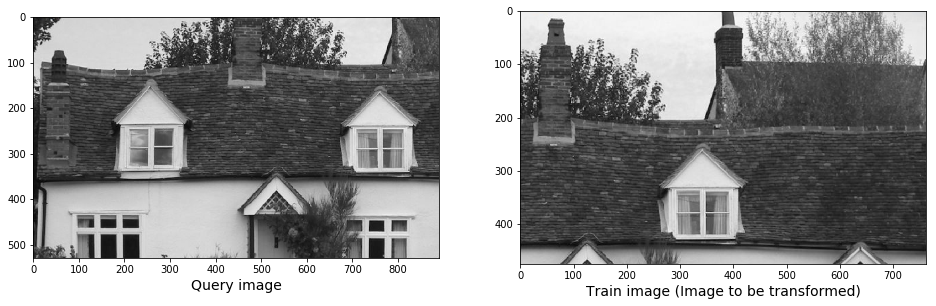

In [4]:
# Baca citra dan ubah jadi grayscale
# Pastikan citra latih (train image) adalah citra yang ingin diubah 
# download gambar di: https://i.im.ge/2021/09/30/THZJwf.png
trainImg = imageio.imread('gambar/house2.png')
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

# download gambar di https://i.im.ge/2021/09/30/THWiP8.png
queryImg = imageio.imread('gambar/house1.png')
# Opencv menggunakan channel warna dengan urutan BGR 
# Maka kita ubah ke RGB supaya kompatibel dengan matplotlib
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()

In [5]:
#fungsi untuk memastikan algoritma fitur descriptor yang akan digunakan
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

In [6]:
#dapatkan keypoint dan fitur dari citra latih dan citra query
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

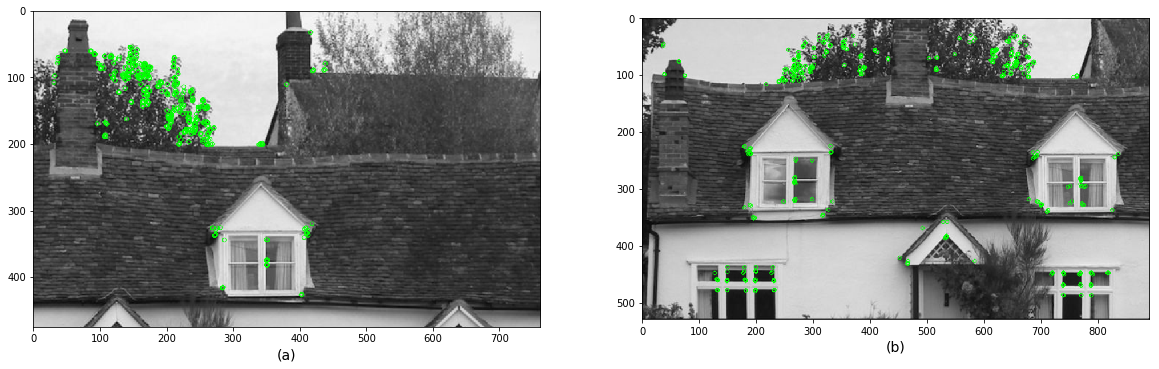

In [7]:
# tampilkan keypoint dan fitur yang terdeteksi pada kedua citra
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

In [8]:
#Fungsi untuk memastikan brute force dengan algoritma distance apa yang akan digunakan
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [9]:
#Fungsi untuk memadankan fitur dari kedua citra lalu mengurutkan berdasarkan jarak
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

In [10]:
#Fungsi menggunakan algoritma kNN untuk memilih jarak terdekat, di sini dipakai k=2
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

Using: bf feature matcher
Raw matches (Brute force): 164


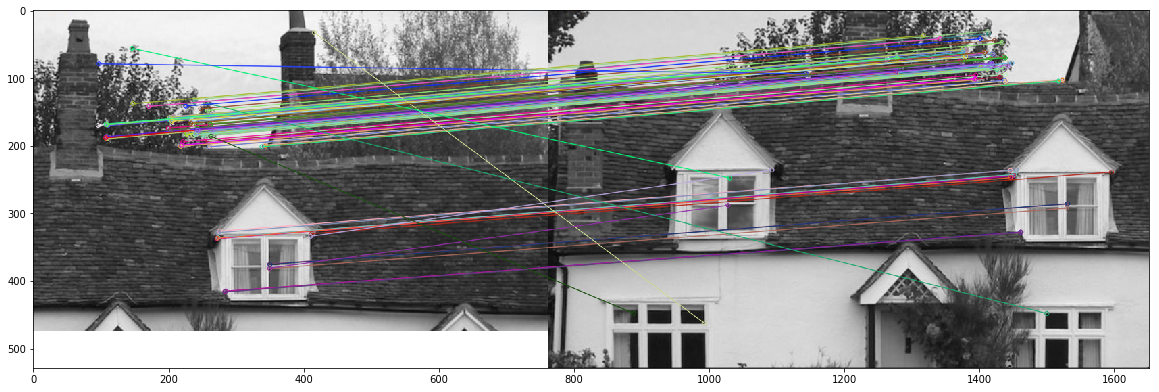

In [11]:
#Fungsi untuk menggambar padanan fitur
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

In [12]:
#Fungsi untuk mencari homografi berdasarkan padanan fitur yang ditemukan 
#dengan mengambil titik-titik dari kedua citra dan mengekstrak matriks transformasi
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [13]:
#Memanggil fungsi homografi
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[ 1.06585460e+00  2.16240842e-02  3.99257745e+02]
 [ 4.23943365e-04  1.06375401e+00 -1.09109620e+02]
 [ 1.55124062e-05  2.77651087e-05  1.00000000e+00]]


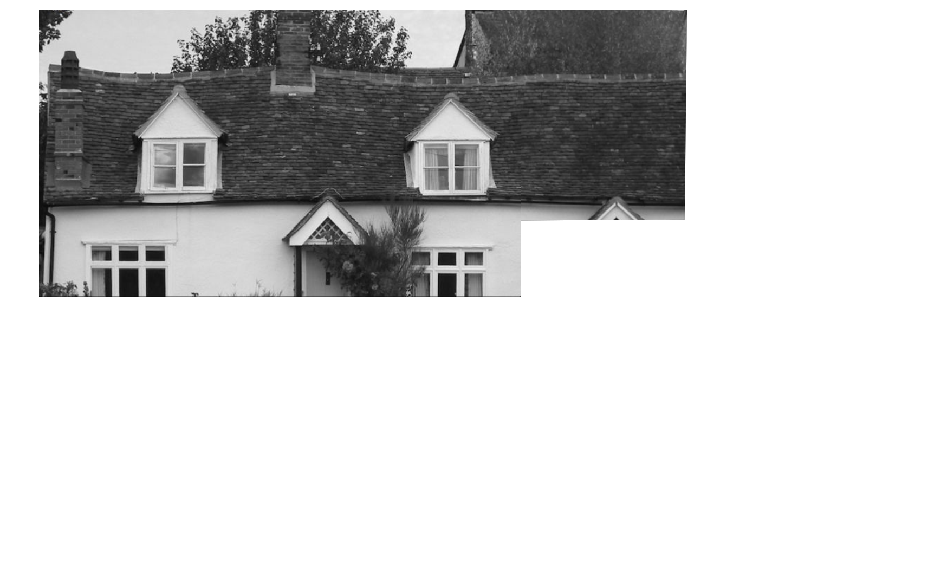

In [14]:
# Menampilkan citra panorama
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

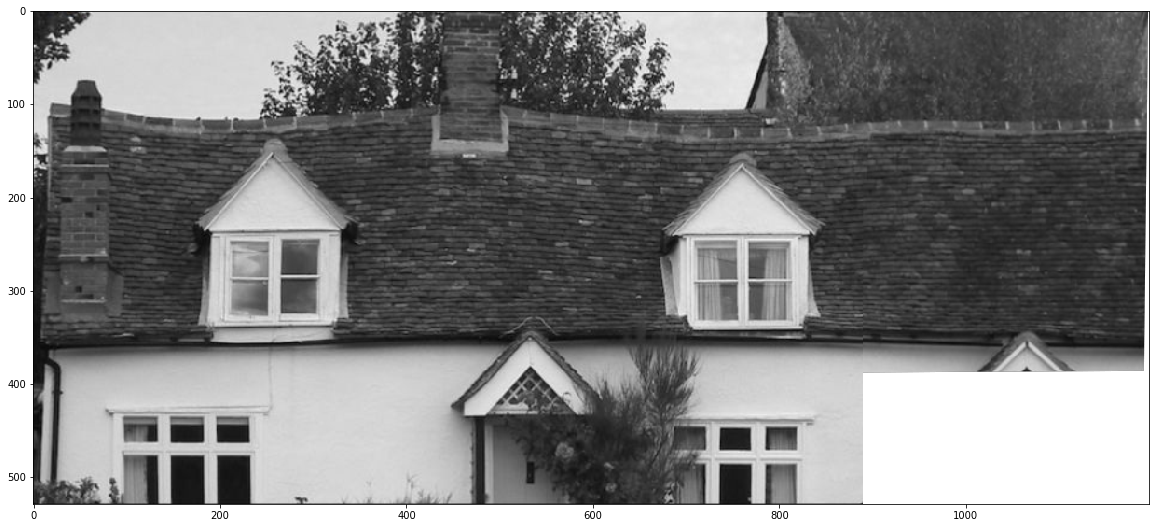

In [15]:
# Mengubah citra panorama menjadi grayscale lalu memotongnya/crop berdasarkan threshould dari kontur  
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)

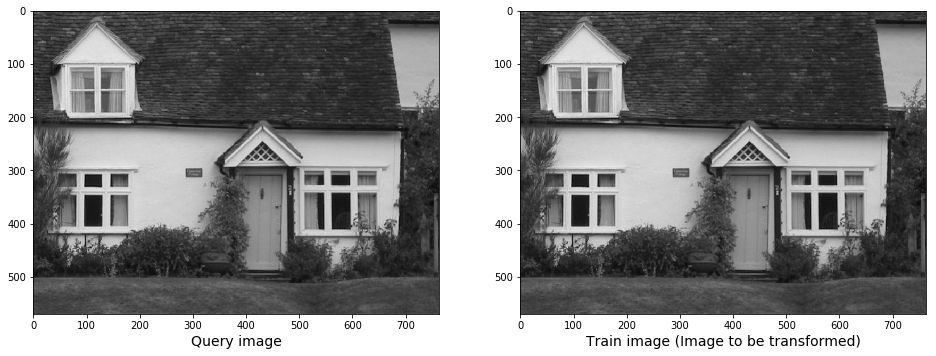

In [30]:
#Latihan 3
#Simpan gambar yang anda hasilkan sebelumnya kemudian lakukan image stitching dengan 
#citra berikut: https://i.im.ge/2021/09/30/THVNLz.png
#Sesudah image stitching, crop image berdasarkan konturnya.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

# default feature matching
feature_matching = 'bf'
feature_extractor = 'orb'

# Fungsi untuk membaca citra
trainImage = imageio.imread('gambar/house.png')
traingImage_grayscale = cv2.cvtColor(trainImage, cv2.COLOR_BGR2GRAY)

queryImage = imageio.imread('gambar/house3.png')
queryImage_grayscale = cv2.cvtColor(queryImage, cv2.COLOR_BGR2GRAY)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImage, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImage, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()




In [31]:
#fungsi untuk memastikan algoritma fitur descriptor yang akan digunakan
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

Text(0.5,0,'(b)')

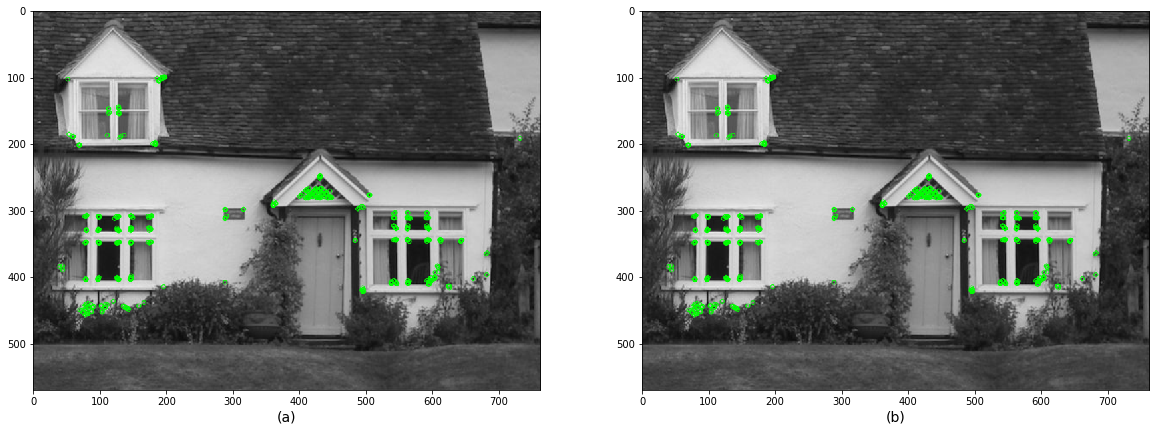

In [25]:
kpsA, featuresA = detectAndDescribe(traingImage_grayscale, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImage_grayscale, method=feature_extractor)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(traingImage_grayscale,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImage_grayscale,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

Using: bf feature matcher
Raw matches (Brute force): 500


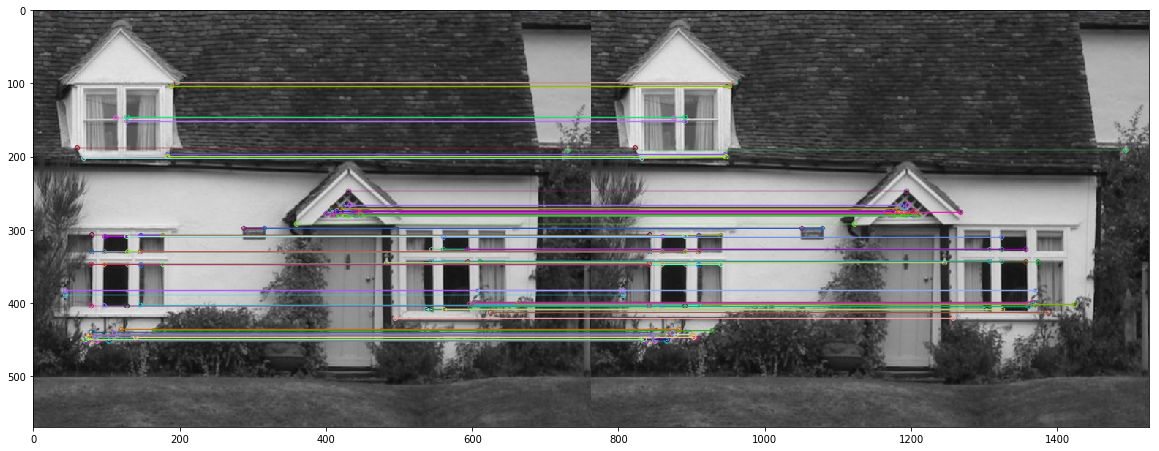

In [32]:
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches


print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImage,kpsA,queryImage,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImage,kpsA,queryImage,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

In [33]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[ 1.00000000e+00 -1.45748468e-15  7.34877965e-14]
 [ 1.20894324e-15  1.00000000e+00  2.08401081e-13]
 [ 3.18585817e-18 -8.21710853e-18  1.00000000e+00]]


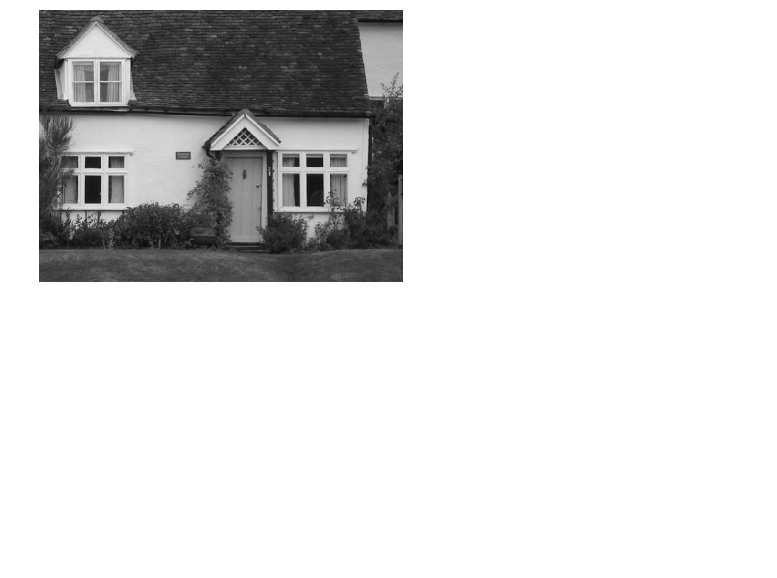

In [34]:
width = trainImage.shape[1] + queryImage.shape[1]
height = trainImage.shape[0] + queryImage.shape[0]

result = cv2.warpPerspective(trainImage, H, (width, height))
result[0:queryImage.shape[0], 0:queryImage.shape[1]] = queryImage

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

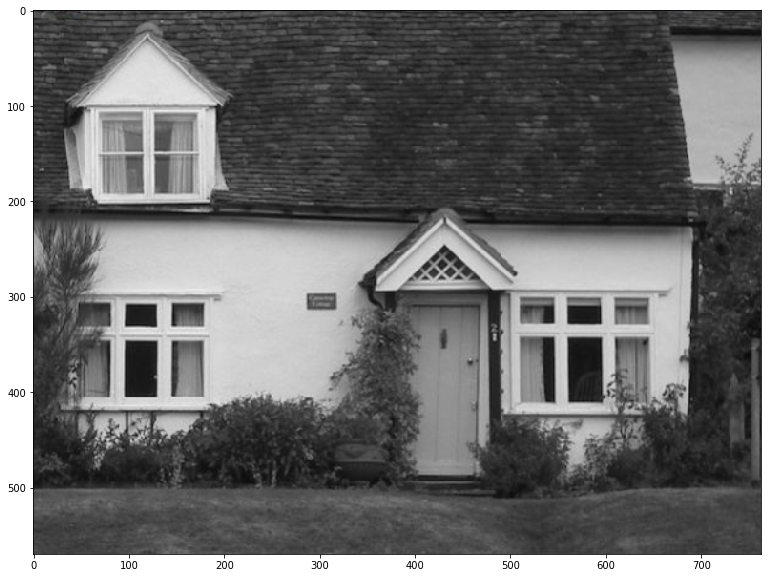

In [35]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)

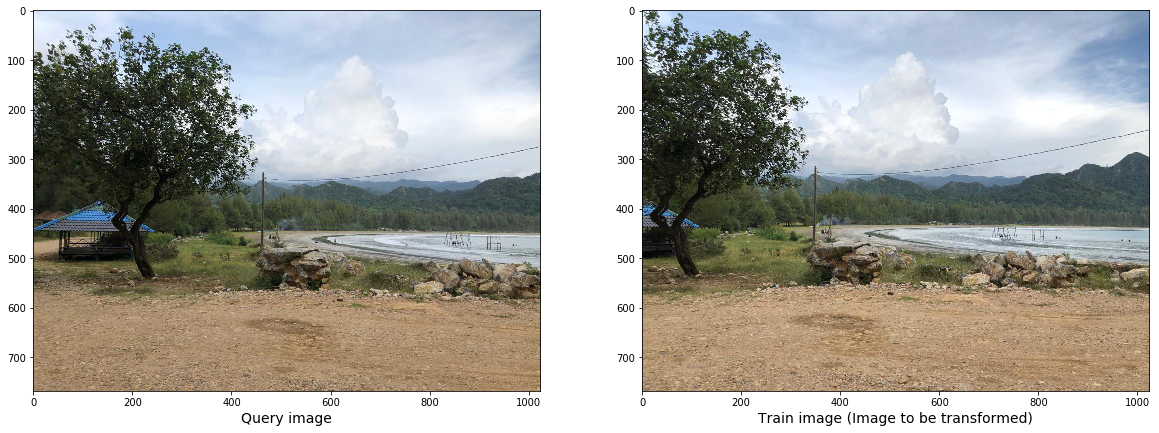

In [42]:
#Latihan 4
#Ambil foto pemandangan sekitar anda menggunakan kamera HP, ambil 2 atau 3 gambar 
#dengan pemandangan yang sama dengan bagian yang mirip, lalu lakukan image stitching dan 
#crop image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import imageio
cv2.ocl.setUseOpenCL(False)
feature_extractor = 'orb'
feature_matching = 'bf'

trainImg = imageio.imread('gambar/pemandangan1.jpeg')
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_BGR2GRAY)

queryImg = imageio.imread('gambar/pemandangan2.jpeg')
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, constrained_layout=False, figsize=(20,10))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()


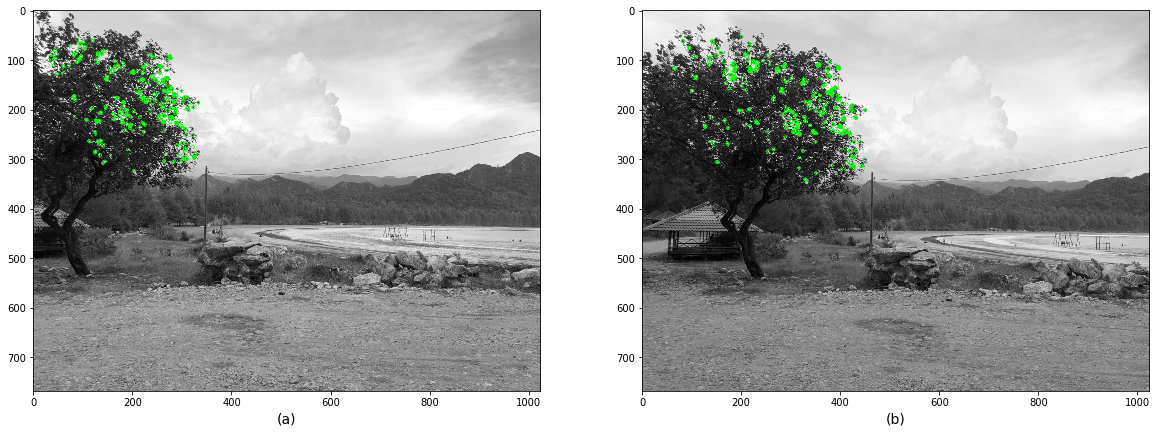

In [43]:
#fungsi untuk memastikan algoritma fitur descriptor yang akan digunakan
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

#dapatkan keypoint dan fitur dari citra latih dan citra query
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

# tampilkan keypoint dan fitur yang terdeteksi pada kedua citra
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

Using: bf feature matcher
Raw matches (Brute force): 199


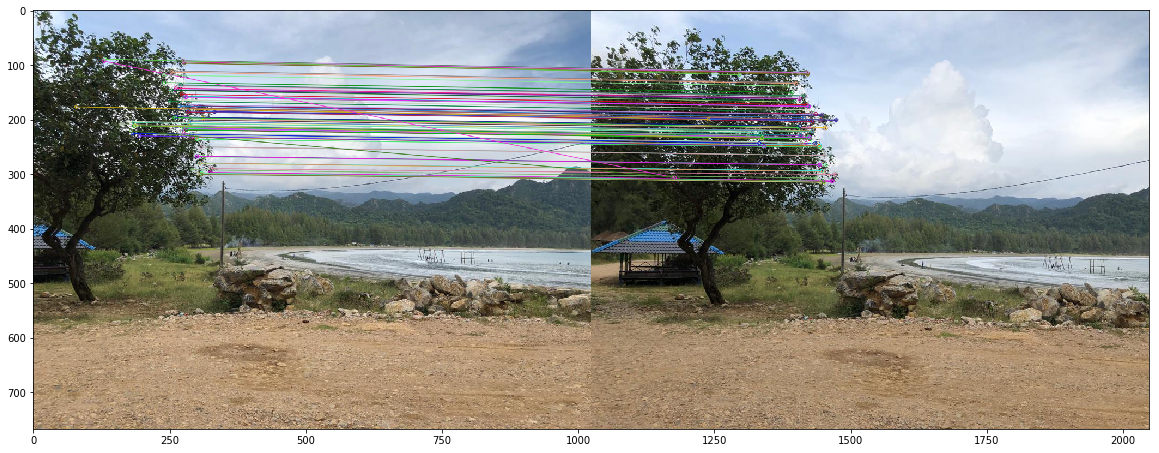

In [44]:
#Fungsi untuk memastikan brute force dengan algoritma distance apa yang akan digunakan
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

#Fungsi untuk memadankan fitur dari kedua citra lalu mengurutkan berdasarkan jarak
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

#Fungsi menggunakan algoritma kNN untuk memilih jarak terdekat, di sini dipakai k=2
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

#Fungsi untuk menggambar padanan fitur
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

In [39]:
#Fungsi untuk mencari homografi berdasarkan padanan fitur yang ditemukan 
#dengan mengambil titik-titik dari kedua citra dan mengekstrak matriks transformasi
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

#Memanggil fungsi homografi
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[ 8.54648459e-01 -3.03544959e-02  1.47759585e+02]
 [-4.79025282e-02  9.14050514e-01  3.74337149e+01]
 [-1.17718518e-04 -6.96575852e-05  1.00000000e+00]]


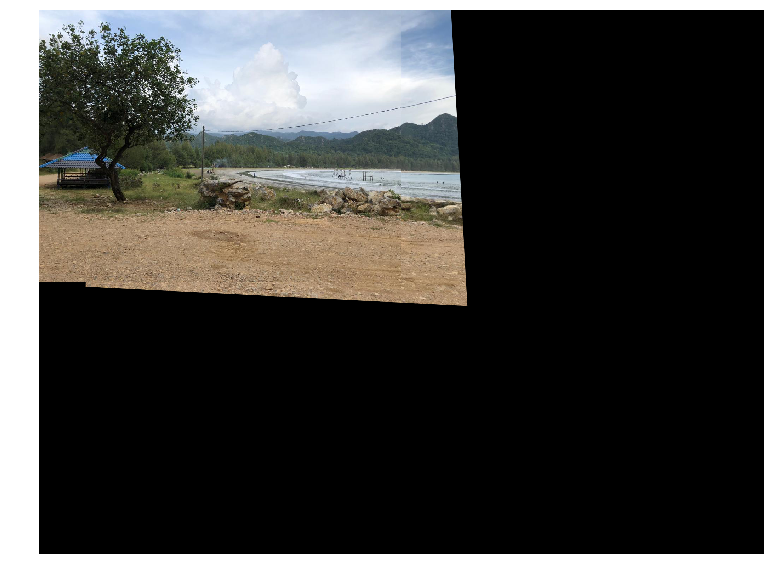

In [45]:
# Menampilkan citra panorama
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

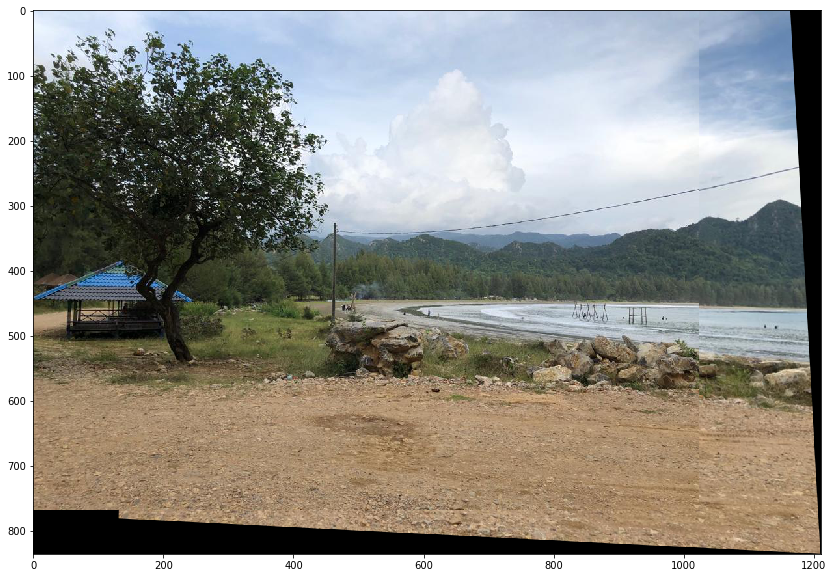

In [46]:
# Mengubah citra panorama menjadi grayscale lalu memotongnya/crop berdasarkan threshould dari kontur  
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)